In [1]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import math
%matplotlib inline

In [62]:
sns.set_theme(context='notebook', style='ticks', palette='colorblind', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.palplot(sns.color_palette())

ValueError: 'okabe' is not a valid palette name

In [139]:
outdir="wos_processed_data"

wos = pd.read_excel(f"../{outdir}/wos_processed.xlsx")
wos_univ = pd.read_excel(f"../{outdir}/wos_institution_locations_harmonized.xlsx")

In [140]:
wos_country = pd.read_excel(f"../{outdir}/wos_countries.xlsx")
wos_country_types = pd.read_excel(f"../{outdir}/wos_country_types.xlsx")

In [137]:
wos_country_types

Country      Country_Type
0            China             China
1      Netherlands                EU
2           Norway  Non-EU associate
3   United Kingdom  Non-EU associate
4           France                EU
5            Italy                EU
6          Denmark                EU
7          Germany                EU
8          Belgium                EU
9         Slovenia                EU
10         Estonia                EU
11         Finland                EU
12        Bulgaria                EU
13           Spain                EU
14          Poland                EU
15  Czech Republic                EU
16          Sweden                EU
17          Greece                EU
18         Austria                EU
19     Switzerland  Non-EU associate
20         Ireland                EU
21        Portugal                EU
22      Luxembourg                EU
23         Romania                EU
24        Slovakia                EU
25         Hungary                EU
26          Cyprus                EU
27         Croatia                EU
28       Lithuania                EU
29          Latvia                EU
30           Malta                EU

In [7]:
len(wos),len(wos_univ_locations)

(41377, 155067)

In [46]:

# wos_addresses = pd.read_excel(f"/{outdir}/wos_addresses.xlsx")

# wos_affiliations = pd.read_excel(f"/{outdir}/wos_affiliations.xlsx")

# wos_author_locations = pd.read_excel(f"/{outdir}/wos_author_locations.xlsx")

# wos_univ_locations = pd.read_excel(f"/{outdir}/wos_univ_locations.xlsx")

In [8]:
record_col = "UT (Unique WOS ID)"

# Output - per yer, by Metrix taxonomy

## Domains

In [26]:
group = 'Domain_English'
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=record_col)
data

Domain_English  UT (Unique WOS ID)
0            Applied Sciences               27805
5            Natural Sciences                7869
3             Health Sciences                3748
2  Economic & Social Sciences                1194
4           Multidisciplinary                 703
1           Arts & Humanities                  58

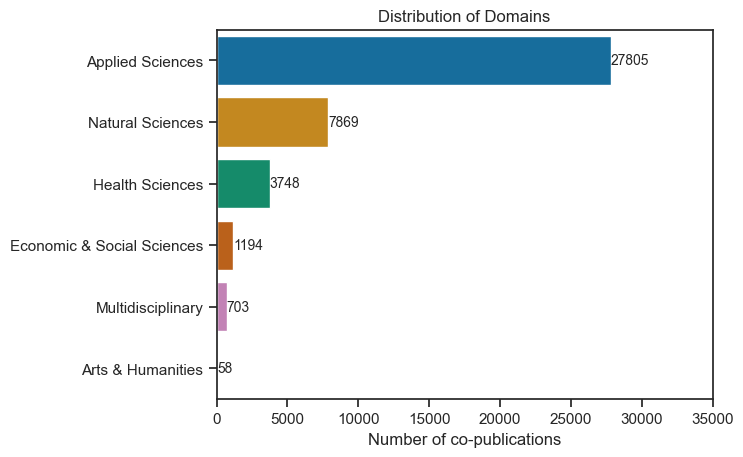

In [52]:
g = sns.barplot(data, x=record_col, y=group)
g.set_xlim(0,35000)
g.set_ylabel(None)
g.set_xlabel("Number of co-publications")
g.set_title("Distribution of Domains")
for i in g.containers:
    g.bar_label(i,fontsize=10)

In [264]:
group = ['Publication Year','Domain_English']
data = wos.groupby(group)[record_col].nunique().unstack(fill_value=0).stack().reset_index().rename(columns={0:record_col}).sort_values(ascending=False, by=group+[record_col])
data

Publication Year              Domain_English  UT (Unique WOS ID)
71              2022            Natural Sciences                1595
70              2022           Multidisciplinary                 125
69              2022             Health Sciences                 904
68              2022  Economic & Social Sciences                 336
67              2022           Arts & Humanities                  10
..               ...                         ...                 ...
4               2011           Multidisciplinary                  11
3               2011             Health Sciences                  69
2               2011  Economic & Social Sciences                  18
1               2011           Arts & Humanities                   0
0               2011            Applied Sciences                 446

[72 rows x 3 columns]

Text(0.5, 1.0, 'Yearly output of co-publications')

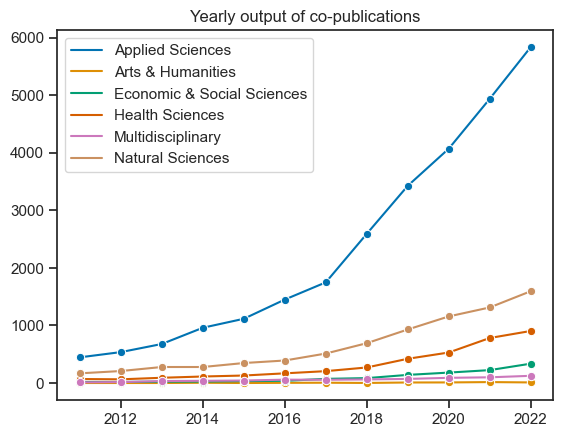

In [56]:
g=sns.lineplot(data.sort_values(ascending=True, by=group[-1]),y=record_col,x=group[0], hue=group[-1], marker="o")
g.set(xticks=list(range(2012,2022+1,2)))
g.legend(title=None)
g.set_xlabel(None)
g.set_ylabel(None)
g.set_title("Yearly output of co-publications")

In [266]:
pivot_data = pd.pivot_table(data, values=record_col, index=['Domain_English'],

                       columns=['Publication Year'], fill_value=0)
pivot_data

Publication Year            2011  2012  2013  2014  2015  2016  2017  2018   
Domain_English                                                               
Applied Sciences             446   537   678   960  1116  1450  1749  2593  \
Arts & Humanities              0     0     0     4     0     3     5     1   
Economic & Social Sciences    18    18    23    25    33    38    72    85   
Health Sciences               69    64    91   113   130   168   206   270   
Multidisciplinary             11    16    34    38    43    58    56    62   
Natural Sciences             168   208   278   278   347   391   512   692   

Publication Year            2019  2020  2021  2022  
Domain_English                                      
Applied Sciences            3427  4072  4939  5838  
Arts & Humanities              9    10    16    10  
Economic & Social Sciences   141   181   224   336  
Health Sciences              421   530   782   904  
Multidisciplinary             71    90    99   125  
Natural Sciences             930  1157  1313  1595

[Text(0.5, 33.249999999999986, ''), Text(79.74999999999999, 0.5, '')]

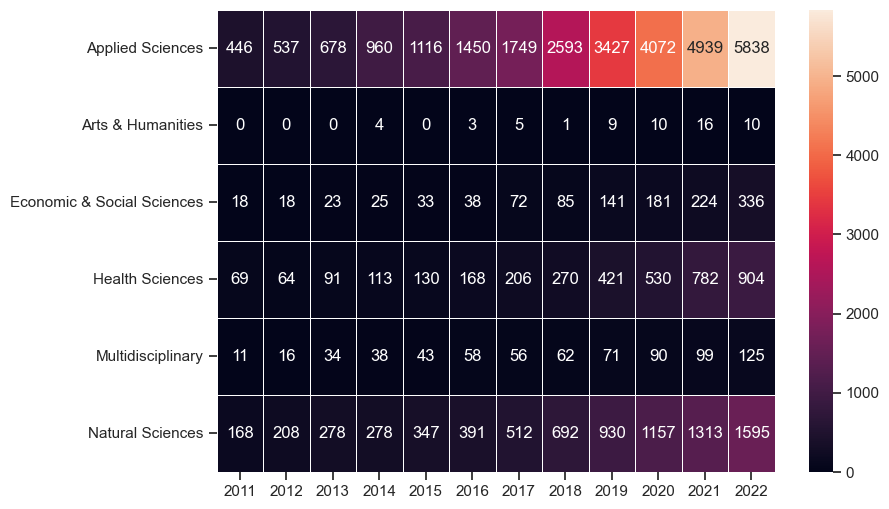

In [269]:
f, ax = plt.subplots(figsize=(9, 6))
g = sns.heatmap(pivot_data, annot=True, fmt="d", linewidths=.5, ax=ax)
g.set(xlabel="", ylabel="")

In [281]:
import numpy as np
percent_pivot = pd.crosstab(data['Domain_English'], data['Publication Year'], values=data[record_col], aggfunc=np.sum, normalize='columns')*100
percent_pivot

Publication Year                 2011       2012       2013       2014   
Domain_English                                                           
Applied Sciences            62.640449  63.701068  61.413043  67.700987  \
Arts & Humanities            0.000000   0.000000   0.000000   0.282087   
Economic & Social Sciences   2.528090   2.135231   2.083333   1.763047   
Health Sciences              9.691011   7.591934   8.242754   7.968970   
Multidisciplinary            1.544944   1.897983   3.079710   2.679831   
Natural Sciences            23.595506  24.673784  25.181159  19.605078   

Publication Year                 2015       2016       2017       2018   
Domain_English                                                           
Applied Sciences            66.866387  68.785579  67.269231  70.024305  \
Arts & Humanities            0.000000   0.142315   0.192308   0.027005   
Economic & Social Sciences   1.977232   1.802657   2.769231   2.295436   
Health Sciences              7.789095   7.969639   7.923077   7.291385   
Multidisciplinary            2.576393   2.751423   2.153846   1.674318   
Natural Sciences            20.790893  18.548387  19.692308  18.687551   

Publication Year                 2019       2020       2021       2022  
Domain_English                                                          
Applied Sciences            68.553711  67.417219  66.987658  66.280654  
Arts & Humanities            0.180036   0.165563   0.217008   0.113533  
Economic & Social Sciences   2.820564   2.996689   3.038112   3.814714  
Health Sciences              8.421684   8.774834  10.606266  10.263397  
Multidisciplinary            1.420284   1.490066   1.342737   1.419164  
Natural Sciences            18.603721  19.155629  17.808219  18.108538

[Text(0.5, 33.249999999999986, ''), Text(154.75, 0.5, '')]

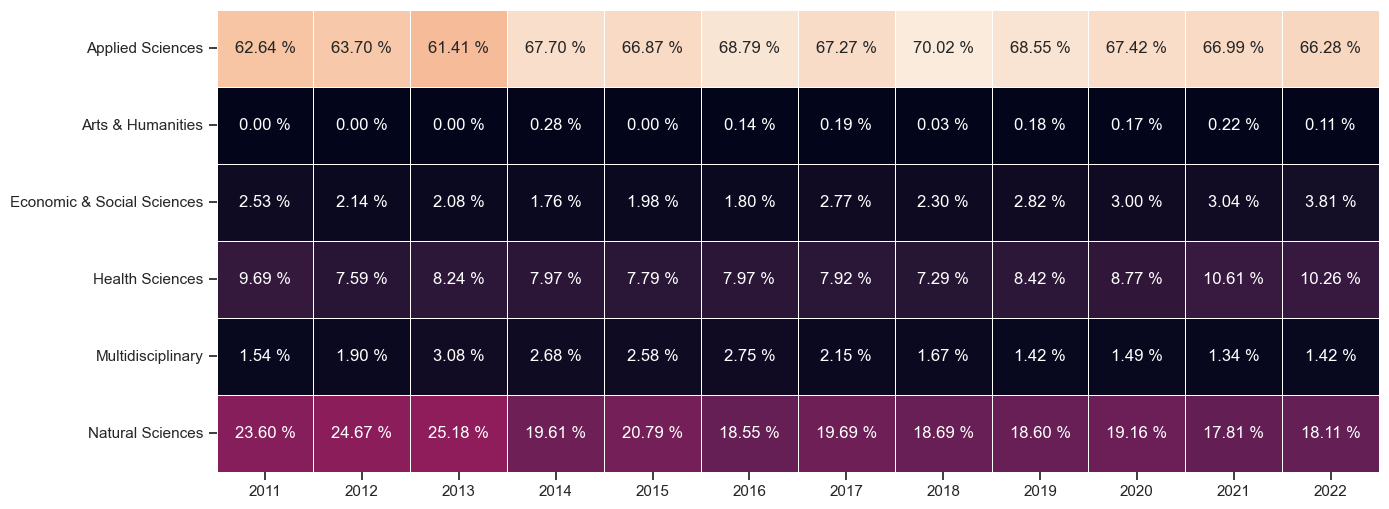

In [285]:
f, ax = plt.subplots(figsize=(15, 6))
g = sns.heatmap(percent_pivot, annot=True, fmt='.2f', linewidths=.5, ax=ax, cbar=False)
for t in ax.texts: t.set_text(t.get_text() + " %")
g.set(xlabel="", ylabel="")

<Axes: xlabel='Publication Year'>

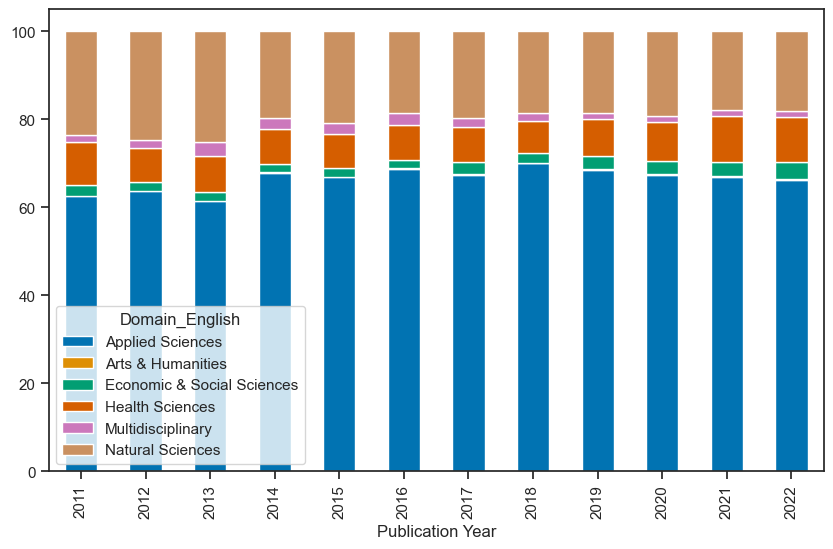

In [288]:
percent_pivot.T.plot(kind='bar',
                    stacked=True,
                    figsize=(10, 6))

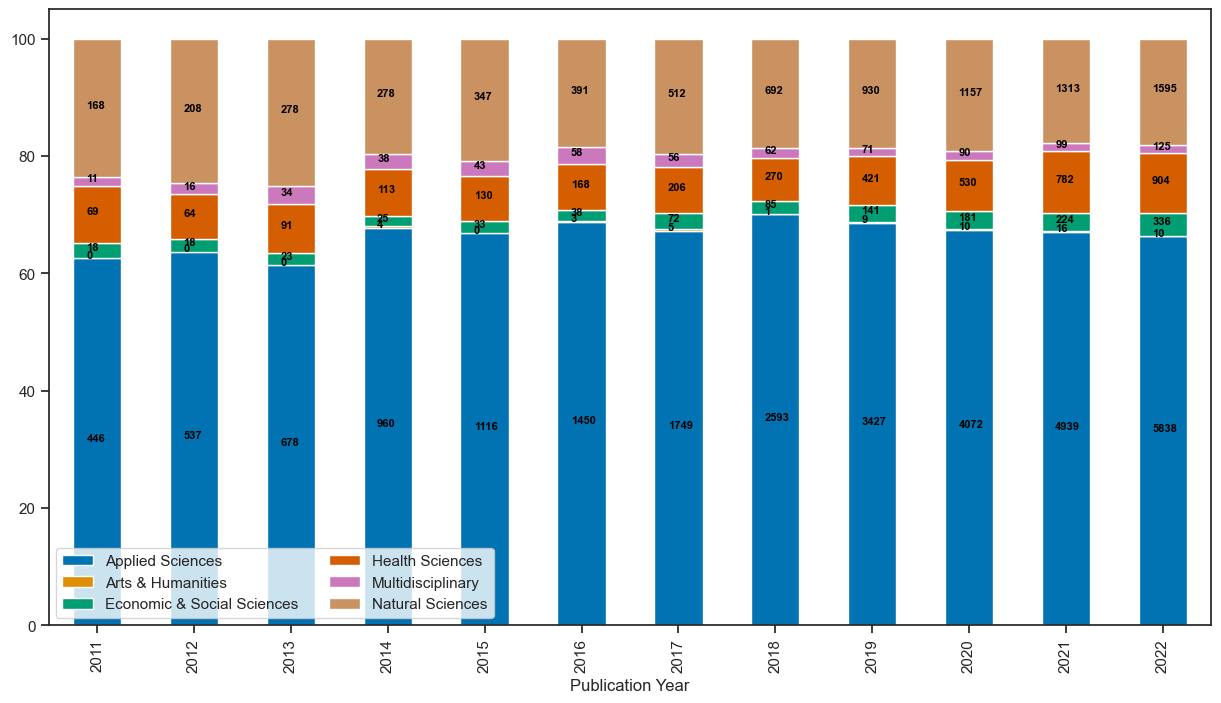

In [307]:
percent_pivot.T.plot(kind='bar',
                        stacked=True,
                        figsize=(15, 8))

plt.legend(loc="lower left", ncol=2)
# plt.ylabel("Release Year")
# plt.xlabel("Proportion")


for n, x in enumerate([*pivot_data.T.index.values]):
    for (proportion, count, y_loc) in zip(percent_pivot.T.loc[x],
                                          pivot_data.T.loc[x],
                                          percent_pivot.T.loc[x].cumsum()):

        plt.text(y=(y_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}',# ({np.round(proportion, 1)}%)',
                 color="black",
                 fontsize=8,
                 fontweight="bold")

plt.show()

## Field

In [72]:
group = ['Publication Year',"Domain_English",'Field_English']
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=group+[record_col])
data

Publication Year    Domain_English   
232              2022  Natural Sciences  \
231              2022  Natural Sciences   
230              2022  Natural Sciences   
229              2022  Natural Sciences   
228              2022  Natural Sciences   
..                ...               ...   
4                2011  Applied Sciences   
3                2011  Applied Sciences   
2                2011  Applied Sciences   
1                2011  Applied Sciences   
0                2011  Applied Sciences   

                                Field_English  UT (Unique WOS ID)  
232                       Physics & Astronomy                 575  
231                  Mathematics & Statistics                 219  
230            Earth & Environmental Sciences                 382  
229                                 Chemistry                 237  
228                                   Biology                 182  
..                                        ...                 ...  
4    Information & Communication Technologies                 238  
3                                 Engineering                 148  
2           Enabling & Strategic Technologies                  46  
1                  Built Environment & Design                   6  
0           Agriculture, Fisheries & Forestry                   8  

[233 rows x 4 columns]

In [74]:
len(data[group[-2]].unique())

6

'Publication Year'

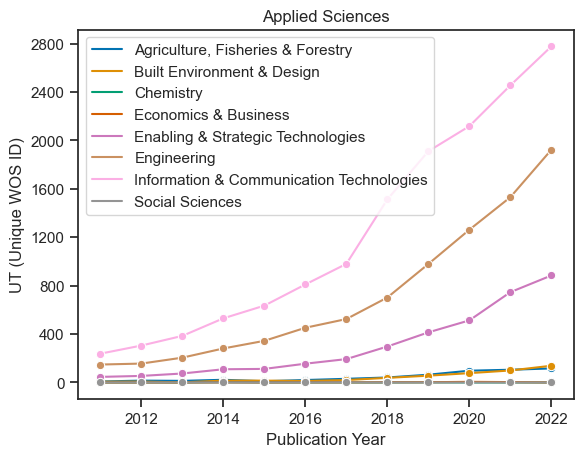

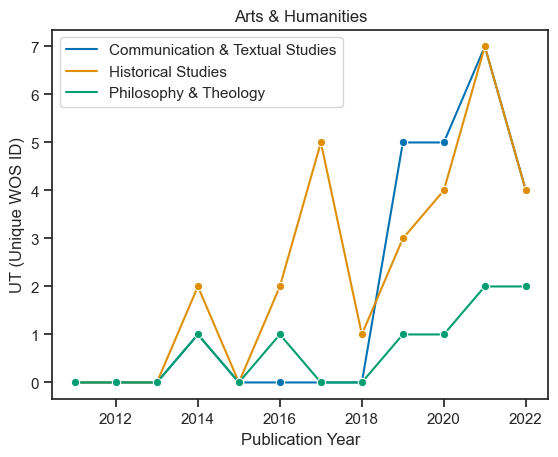

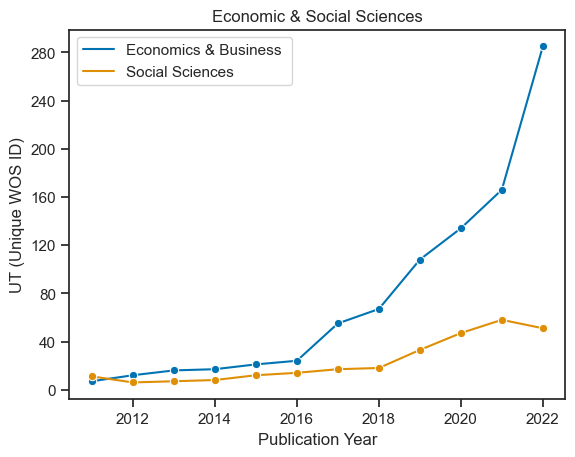

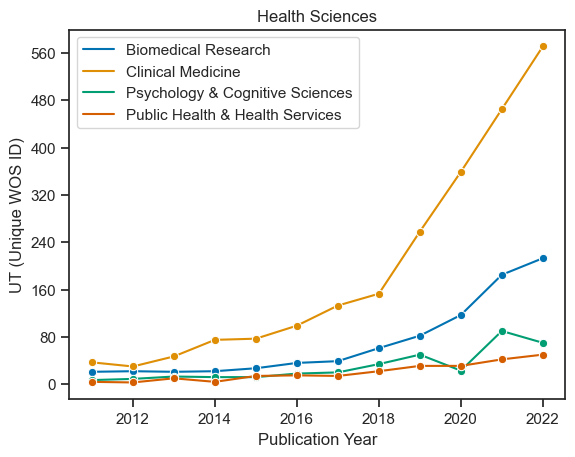

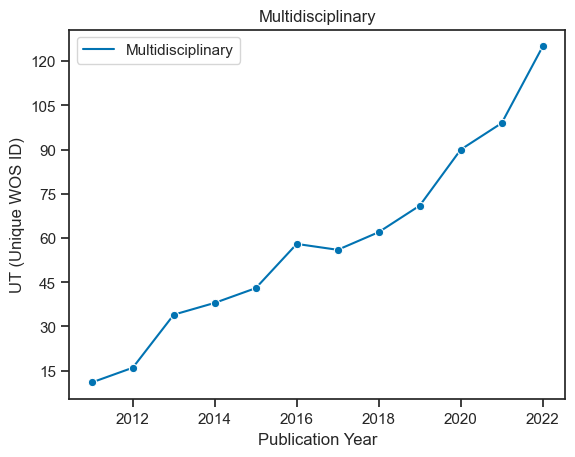

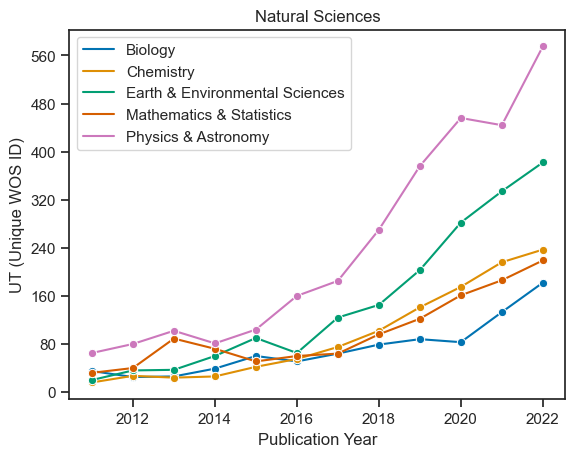

In [78]:
data_complete = pd.DataFrame()

for cat in sorted(data[group[-2]].unique()):
    #data segment
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    data_complete = pd.concat([data_complete,sub_data], ignore_index=True)
    #plot
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),
                   y=record_col,x=group[0], hue=group[-1], marker="o")
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None)
    g.set_title(cat)
    g.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

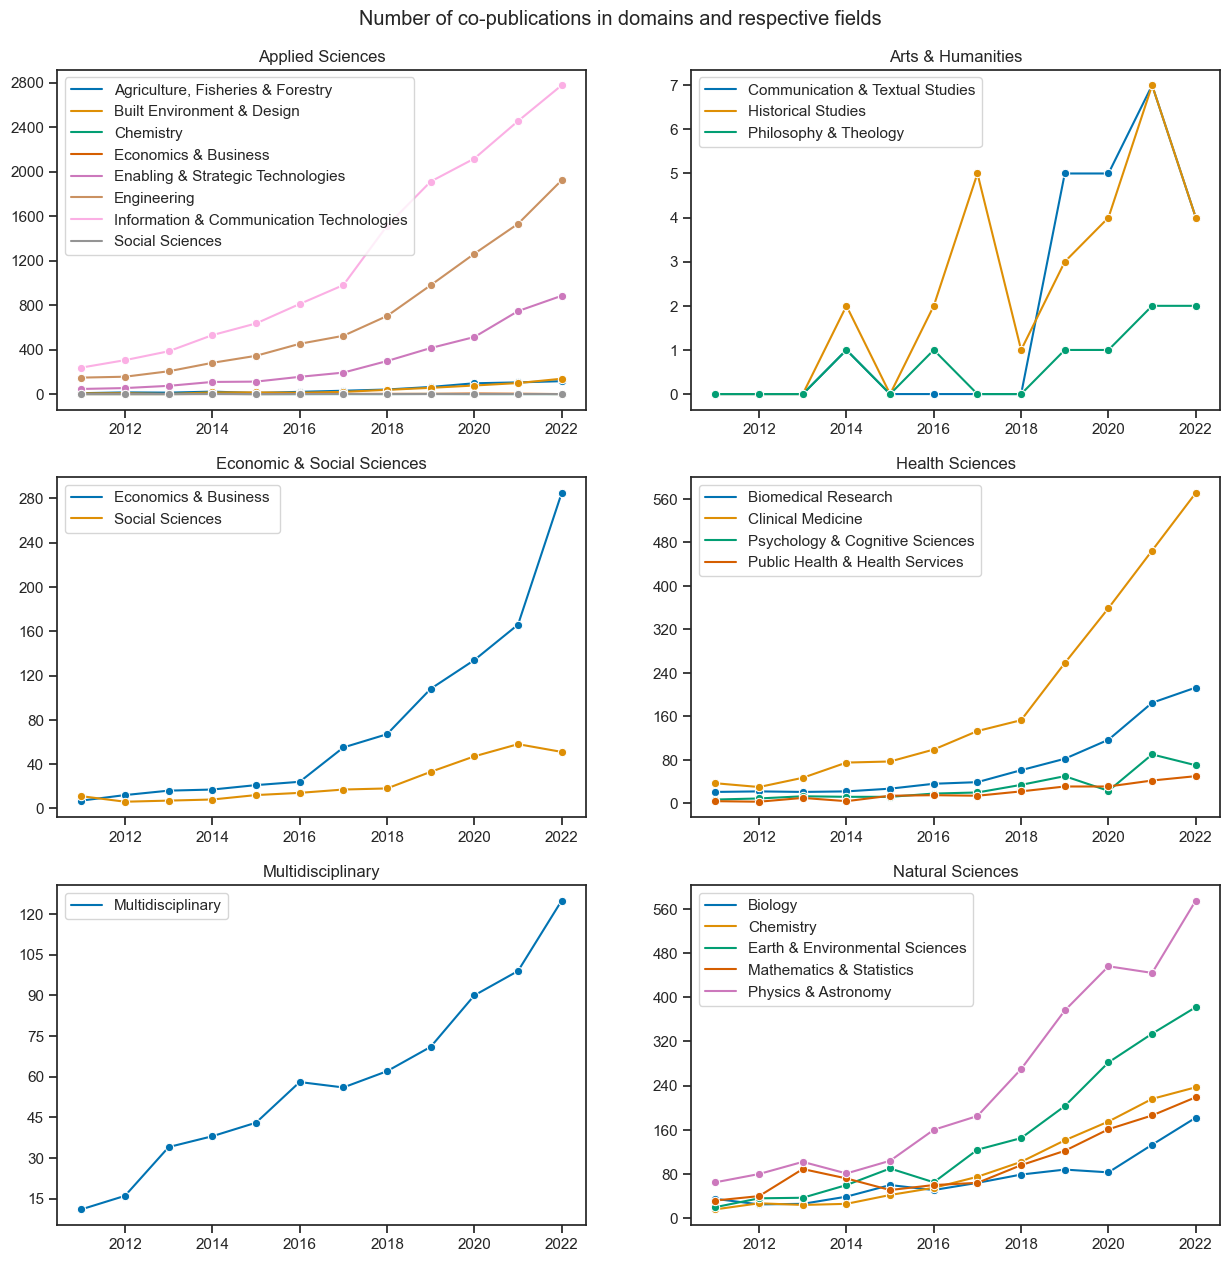

In [124]:
data_complete = pd.DataFrame()

# Creating subplot axes
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15, 15))

for cat,ax in zip(sorted(data[group[-2]].unique()),axes.flatten()):
    #data segment
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    data_complete = pd.concat([data_complete,sub_data], ignore_index=True)
    #plot
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),
                   y=record_col,x=group[0], hue=group[-1], marker="o", ax=ax)
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None)
    g.set_title(cat)
    g.set_xlabel(None)
    g.set_ylabel(None)
    g.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.suptitle("Number of co-publications in domains and respective fields", y=0.92)
plt.show()

## SubField

In [127]:
group = ['Publication Year',"Domain_English",'Field_English',"SubField_English"]
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=group+[record_col])
data

Publication Year    Domain_English                      Field_English   
1464              2022  Natural Sciences                Physics & Astronomy  \
1463              2022  Natural Sciences                Physics & Astronomy   
1462              2022  Natural Sciences                Physics & Astronomy   
1461              2022  Natural Sciences                Physics & Astronomy   
1460              2022  Natural Sciences                Physics & Astronomy   
...                ...               ...                                ...   
4                 2011  Applied Sciences         Built Environment & Design   
3                 2011  Applied Sciences  Agriculture, Fisheries & Forestry   
2                 2011  Applied Sciences  Agriculture, Fisheries & Forestry   
1                 2011  Applied Sciences  Agriculture, Fisheries & Forestry   
0                 2011  Applied Sciences  Agriculture, Fisheries & Forestry   

                SubField_English  UT (Unique WOS ID)  
1464                      Optics                 130  
1463  Nuclear & Particle Physics                  62  
1462        Mathematical Physics                  10  
1461             General Physics                  31  
1460            Fluids & Plasmas                  72  
...                          ...                 ...  
4        Building & Construction                   3  
3                   Food Science                   1  
2                      Fisheries                   2  
1         Dairy & Animal Science                   2  
0         Agronomy & Agriculture                   3  

[1465 rows x 5 columns]

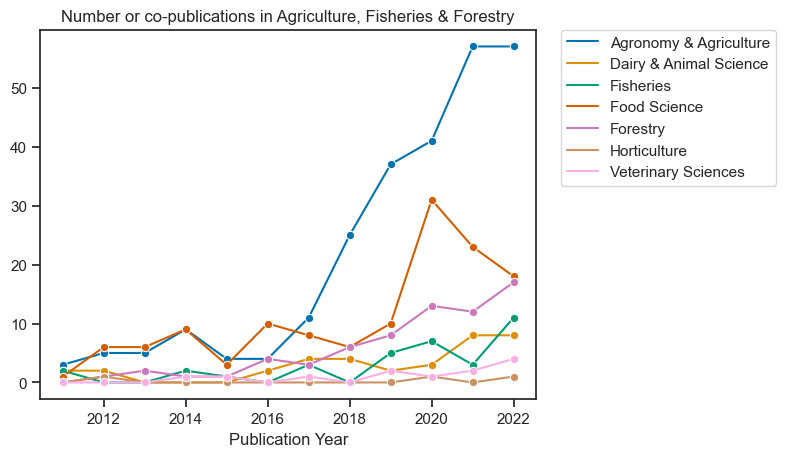

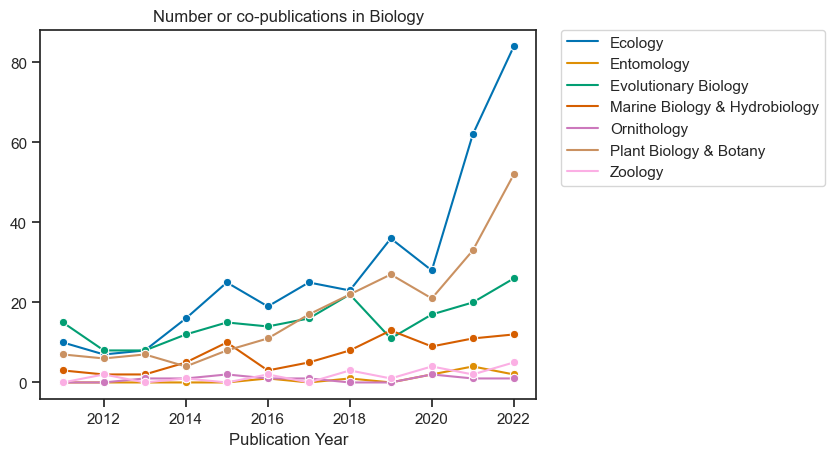

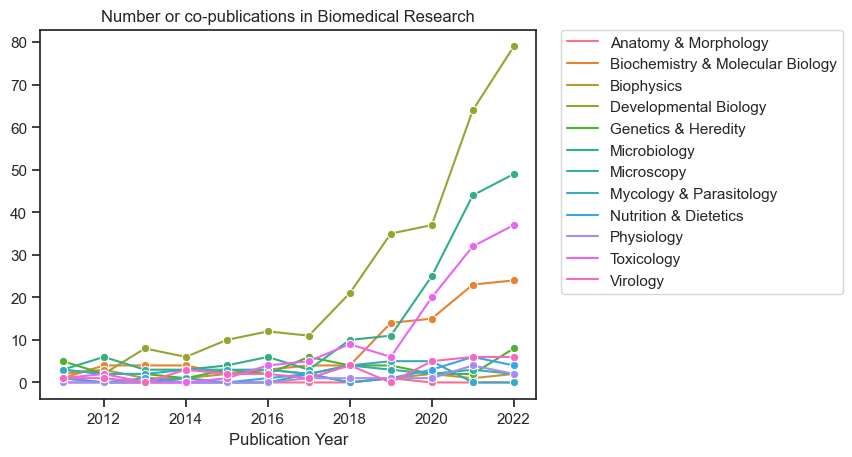

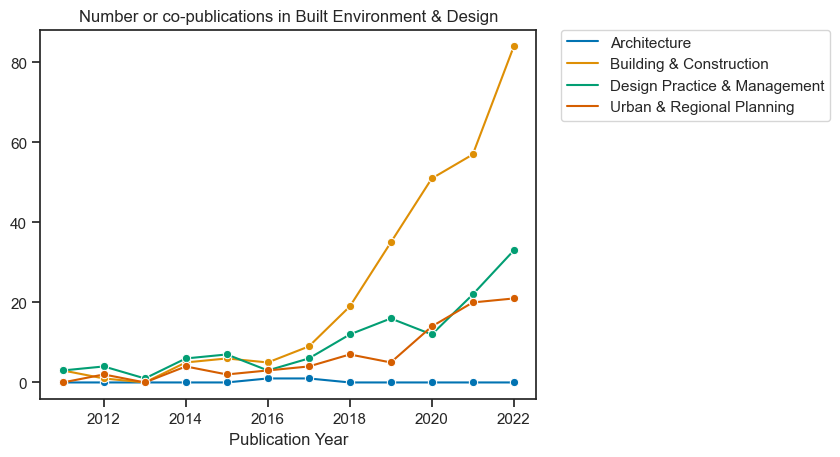

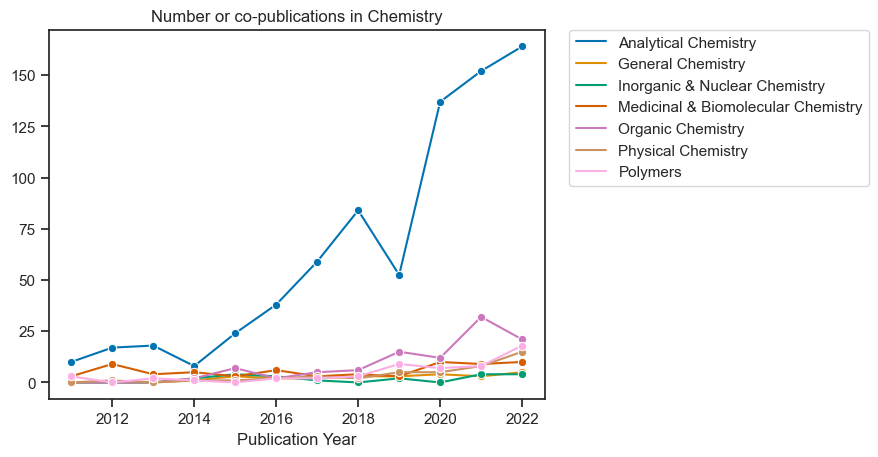

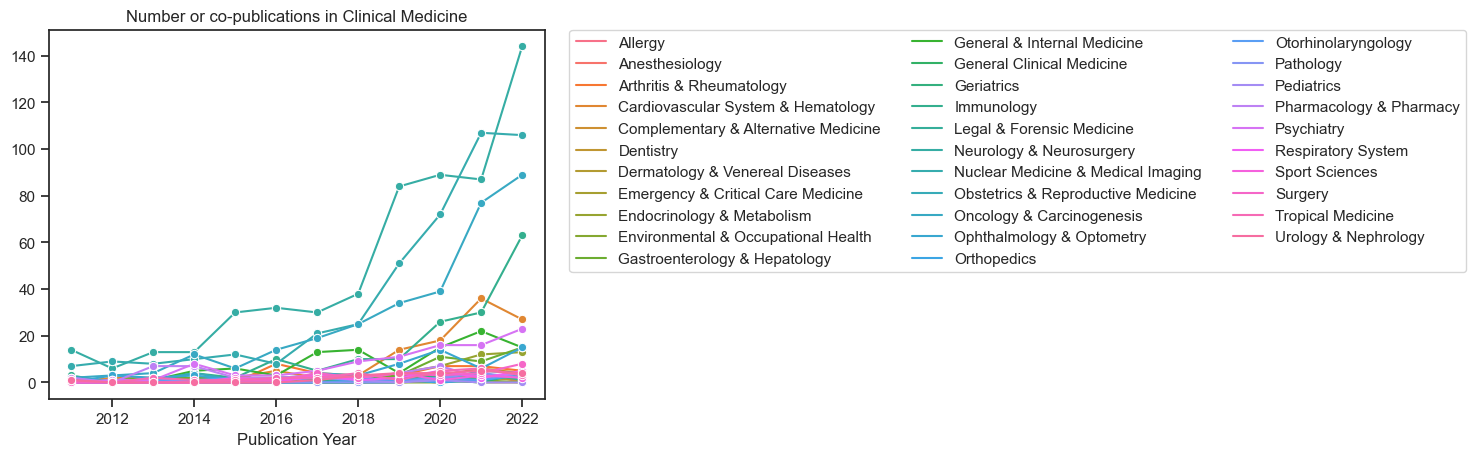

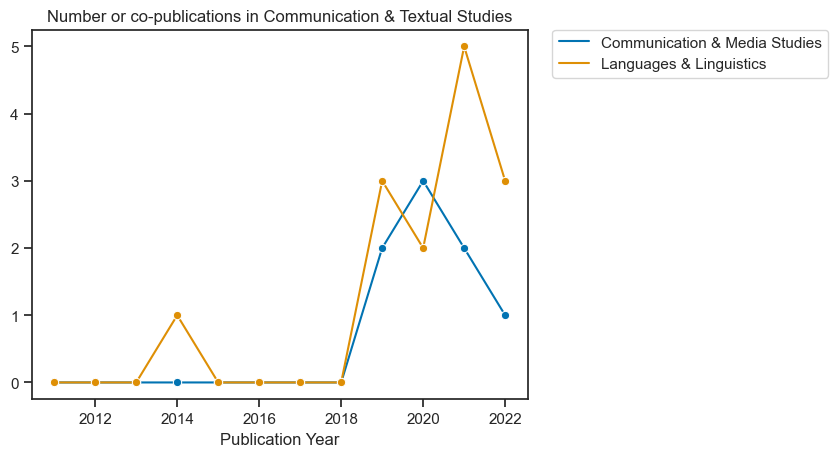

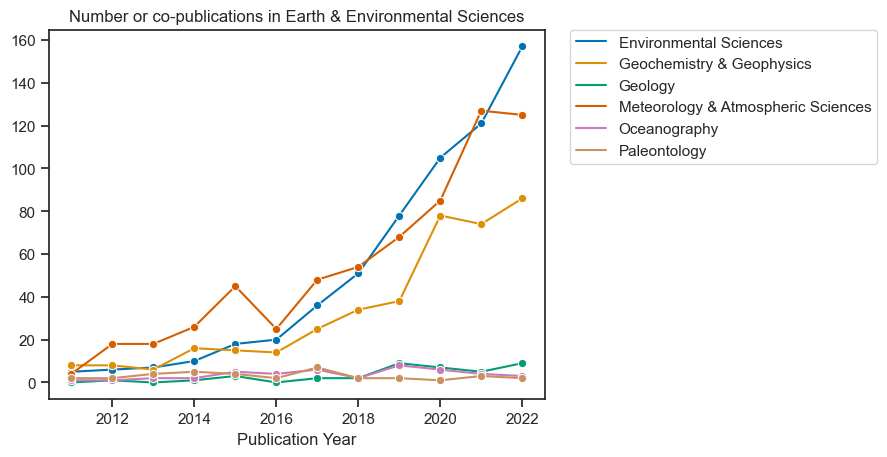

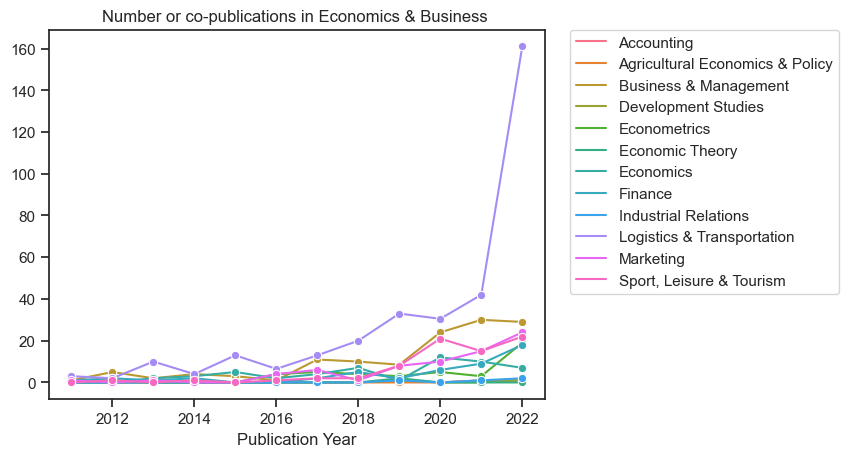

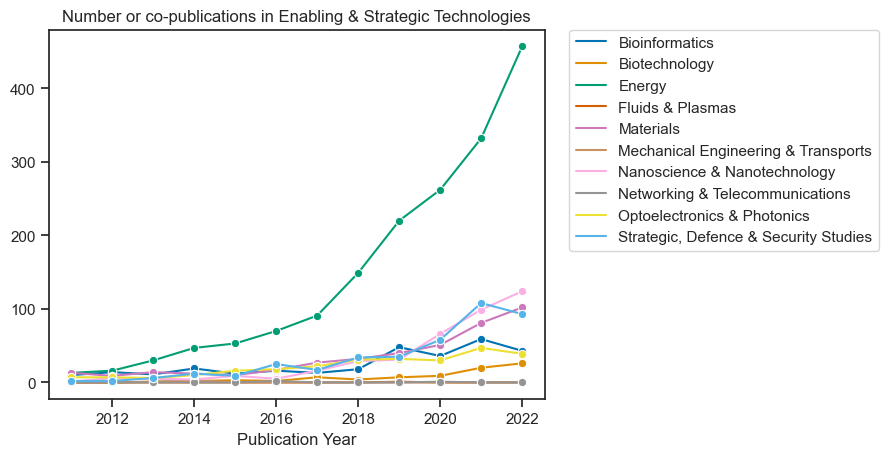

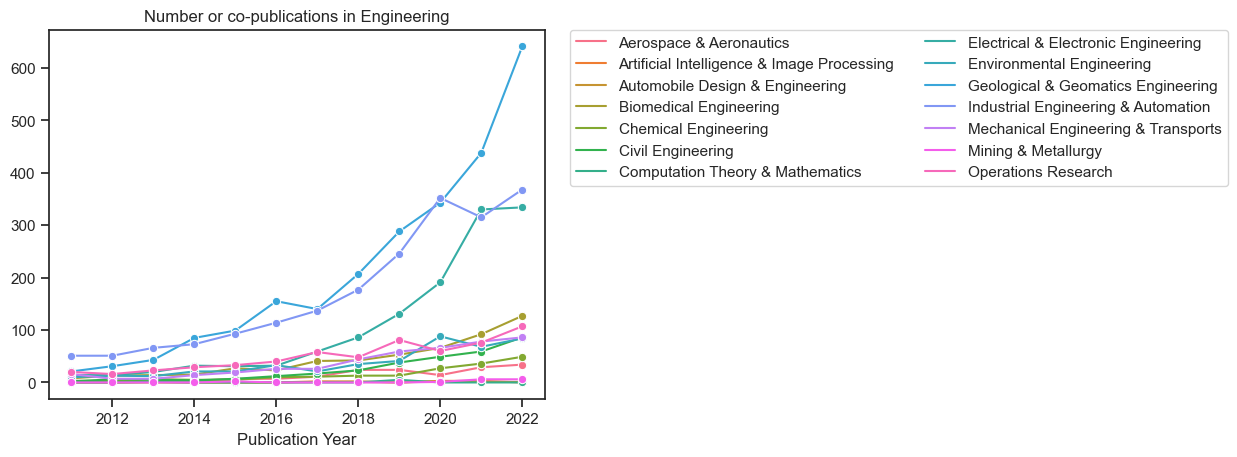

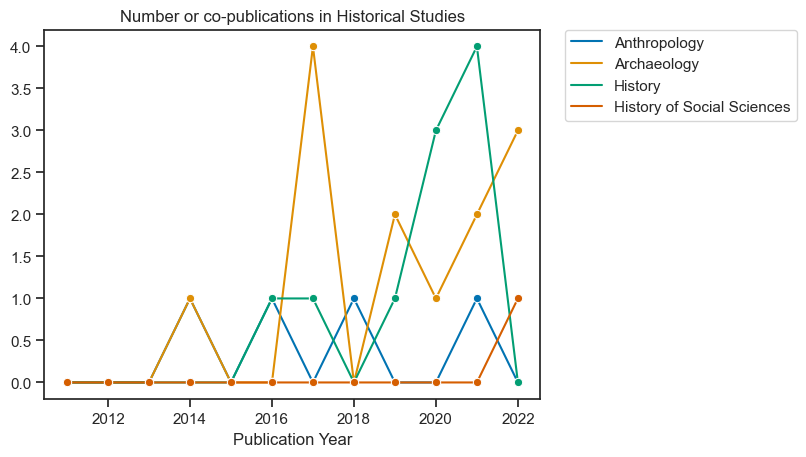

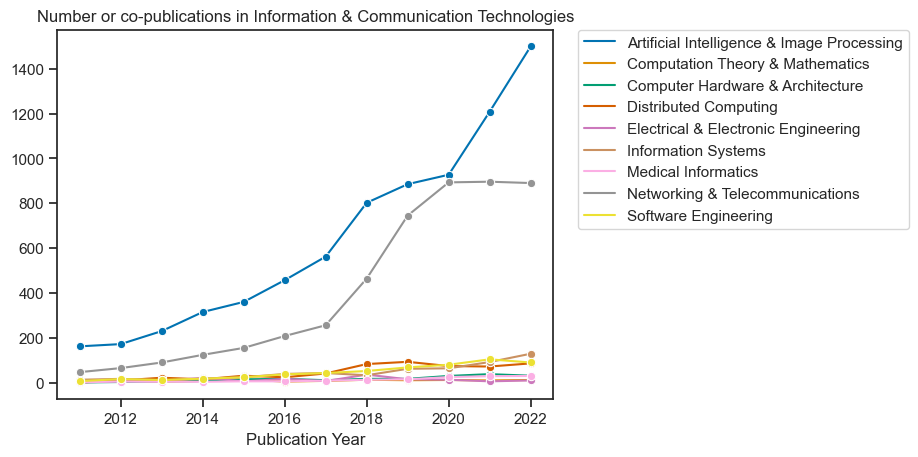

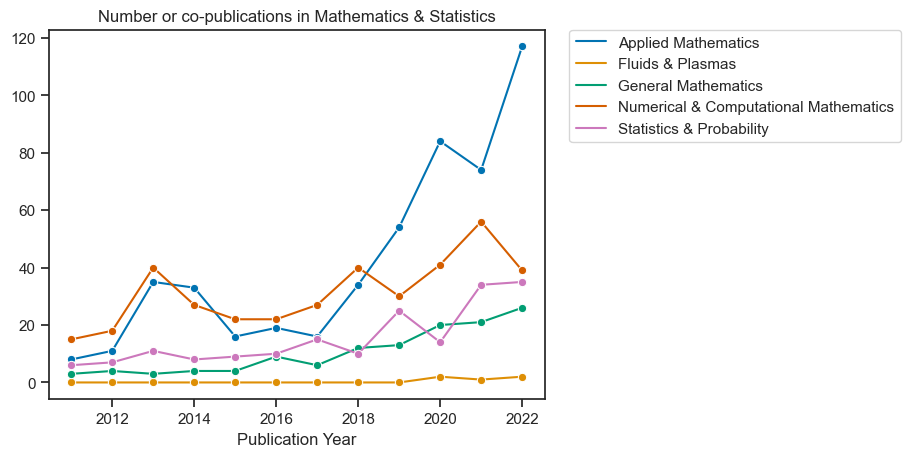

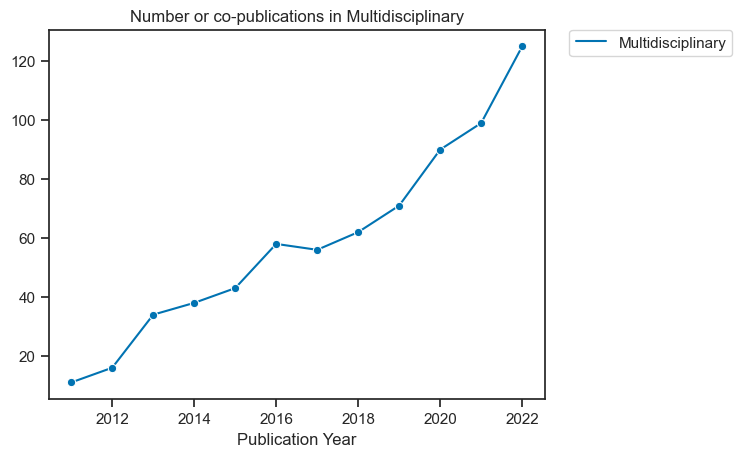

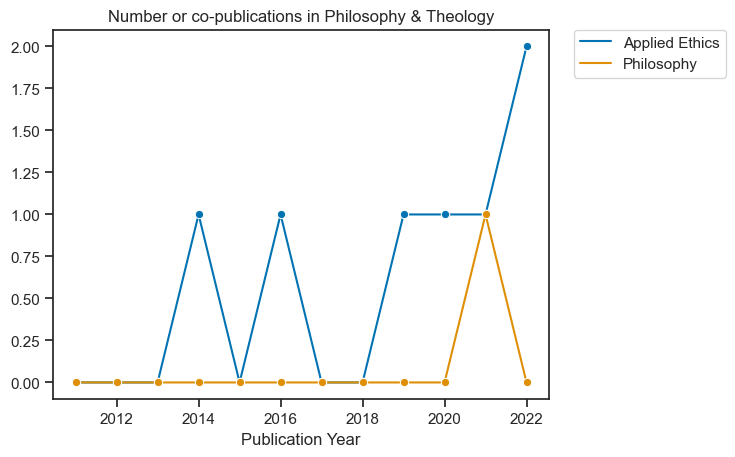

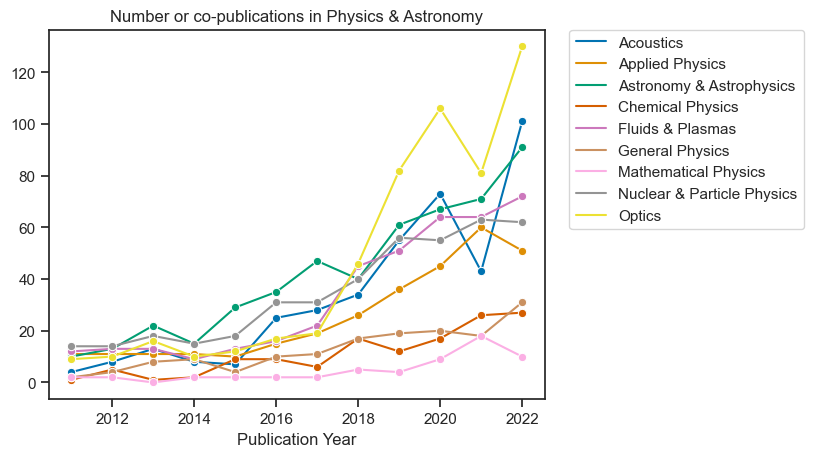

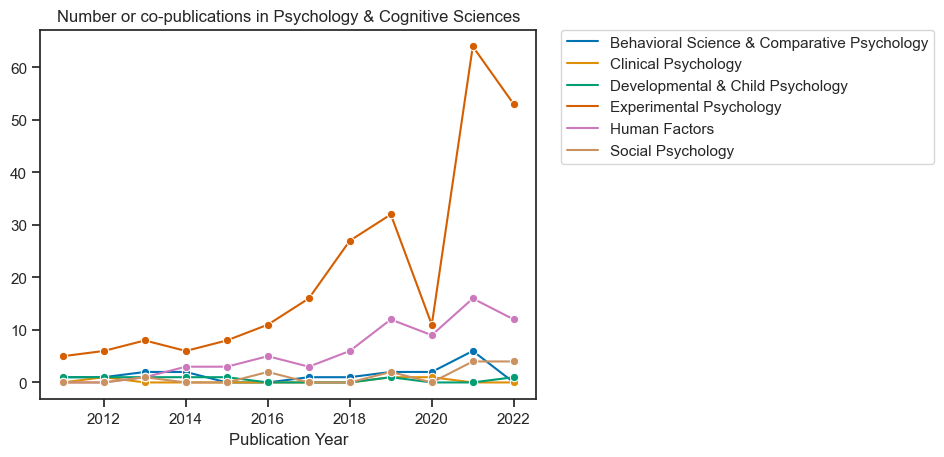

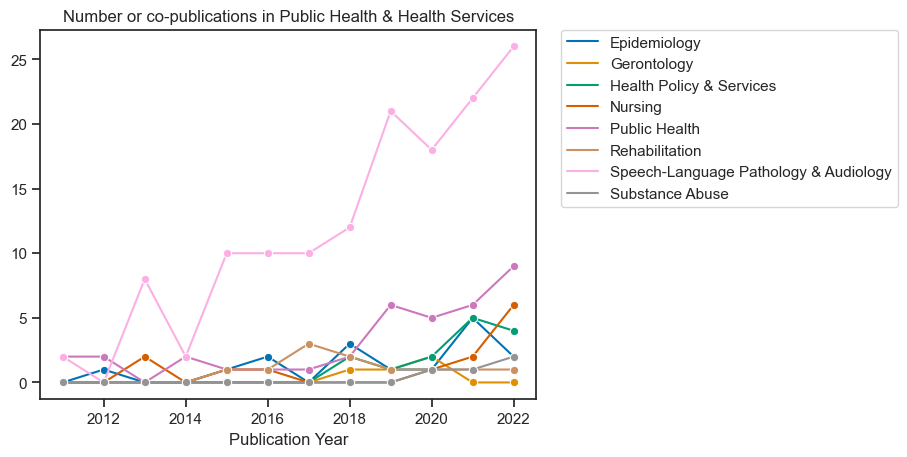

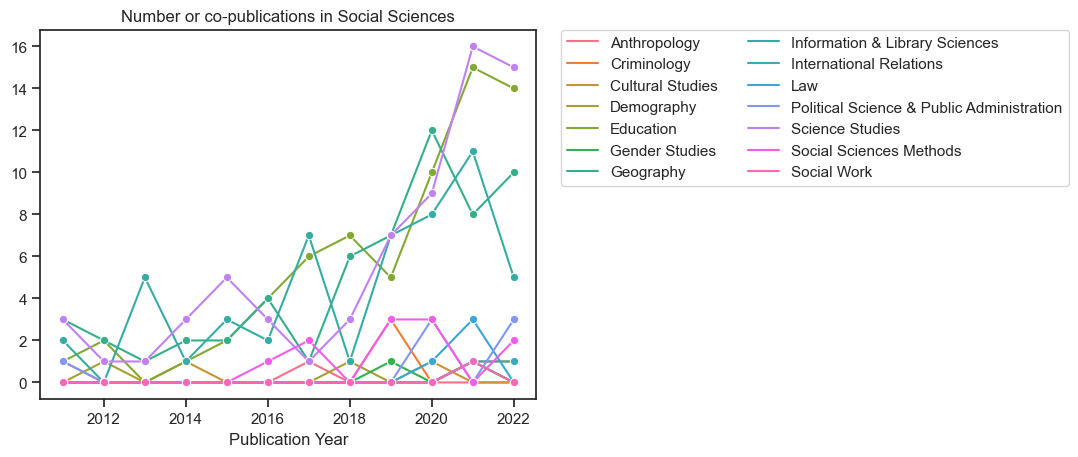

In [138]:
for cat in sorted(data[group[-2]].unique()):
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),y=record_col,x=group[0],
                   hue=group[-1], marker="o", errorbar=None)
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncols=math.ceil(len(g.legend_.texts)/12))
    g.set_title(f'Number or co-publications in {cat}')
    g.set_ylabel(None)
    plt.show()

In [131]:
len(sorted(data[group[-2]].unique()))

20

In [245]:
from  matplotlib.ticker import FuncFormatter
import math
def orderOfMagnitude(number):
    return math.floor(math.log(number, 10))

def roundToNearest(number):
    order = orderOfMagnitude(number)
    # if order!=0:
    #     order+=1
    near = math.ceil(number/10**order)*10**order
    return near

In [221]:
orderOfMagnitude(1.1)

0

In [223]:
roundToNearest(0.4)

1

In [156]:
15//10

1

## Collabs

In [250]:
wos_univ_locations = wos_univ.merge(wos_country_types, on="Country")
wos_univ_locations.sample(100)

UT (Unique WOS ID)                        Institution   
90877   WOS:000579154000008       Ctr Therapeut Target Validat  \
20703   WOS:000453784400017                         Fudan Univ   
101741  WOS:000929537500051                  Publ Hlth England   
137547  WOS:000596812400006                               CSIC   
221     WOS:000288412600011  PKU HKUST Shenzhen Hong Kong Inst   
...                     ...                                ...   
119321  WOS:000310863300008                 Tech Univ Dortmund   
27889   WOS:000496830500113                Harbin Inst Technol   
150774  WOS:000744133100006                   Dublin City Univ   
136356  WOS:000450361100005             Univ Politecn Valencia   
59076   WOS:000781418000001                        Tongji Univ   

               Country              Institution_harm  merge_iter   
90877   United Kingdom  Ctr Therapeut Target Validat           0  \
20703            China                    Fudan Univ           0   
101741  United Kingdom             Publ Hlth England           0   
137547           Spain                          CSIC           0   
221              China       Shenzhen Hong Kong Inst           0   
...                ...                           ...         ...   
119321         Germany            Tech Univ Dortmund           0   
27889            China           Harbin Inst Technol           0   
150774         Ireland              Dublin City Univ           0   
136356           Spain        Univ Politecn Valencia           0   
59076            China                   Tongji Univ           0   

            Country_Type  
90877   Non-EU associate  
20703              China  
101741  Non-EU associate  
137547                EU  
221                China  
...                  ...  
119321                EU  
27889              China  
150774                EU  
136356                EU  
59076              China  

[100 rows x 6 columns]

In [142]:
wos_collabs = wos_univ_locations[wos_univ_locations["Country_Type"]!="Other"][[record_col,"Country"]].drop_duplicates()

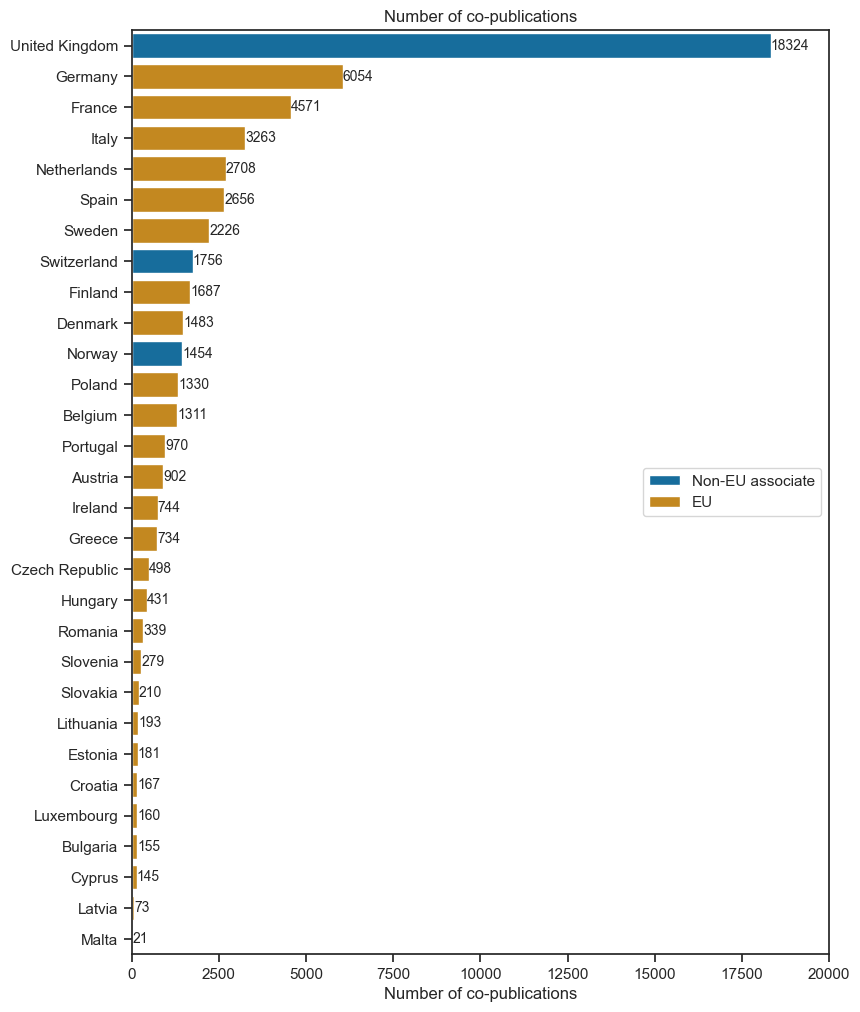

C:\Users\radvanyi\AppData\Local\Temp\ipykernel_1020\556627507.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([str(int(val))+'%' for val in vals])


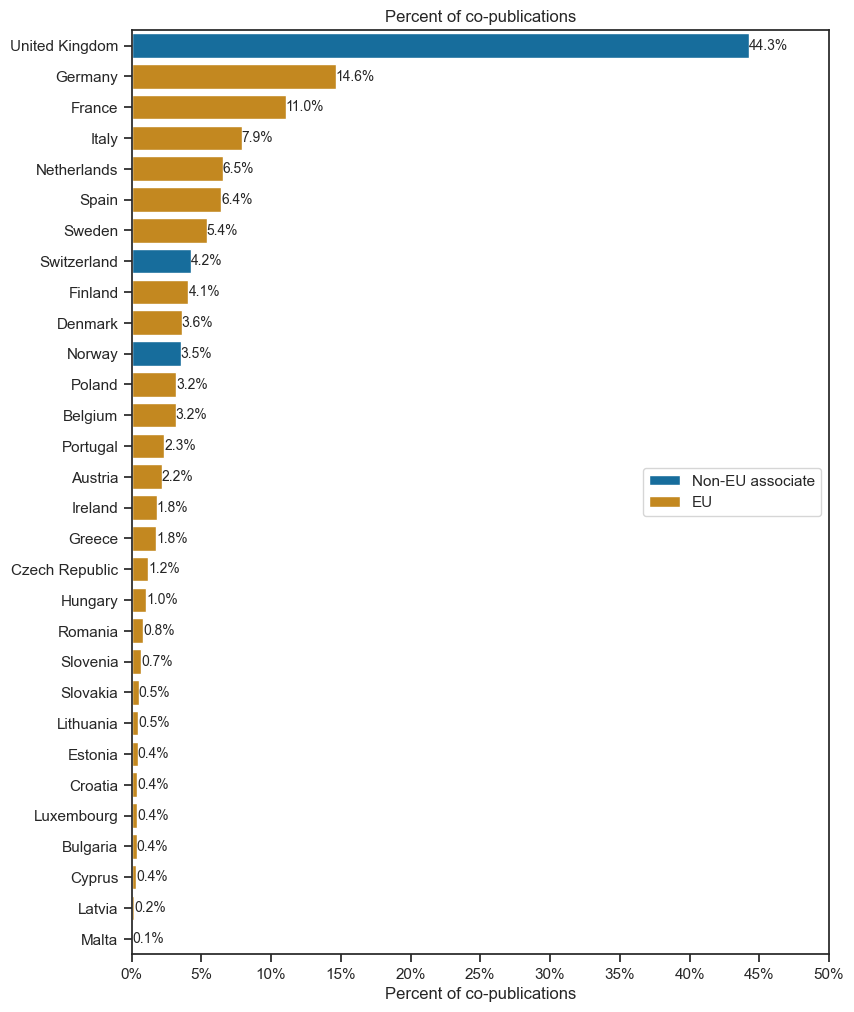

C:\Users\radvanyi\AppData\Local\Temp\ipykernel_1020\556627507.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([str(int(val))+'%' for val in vals])


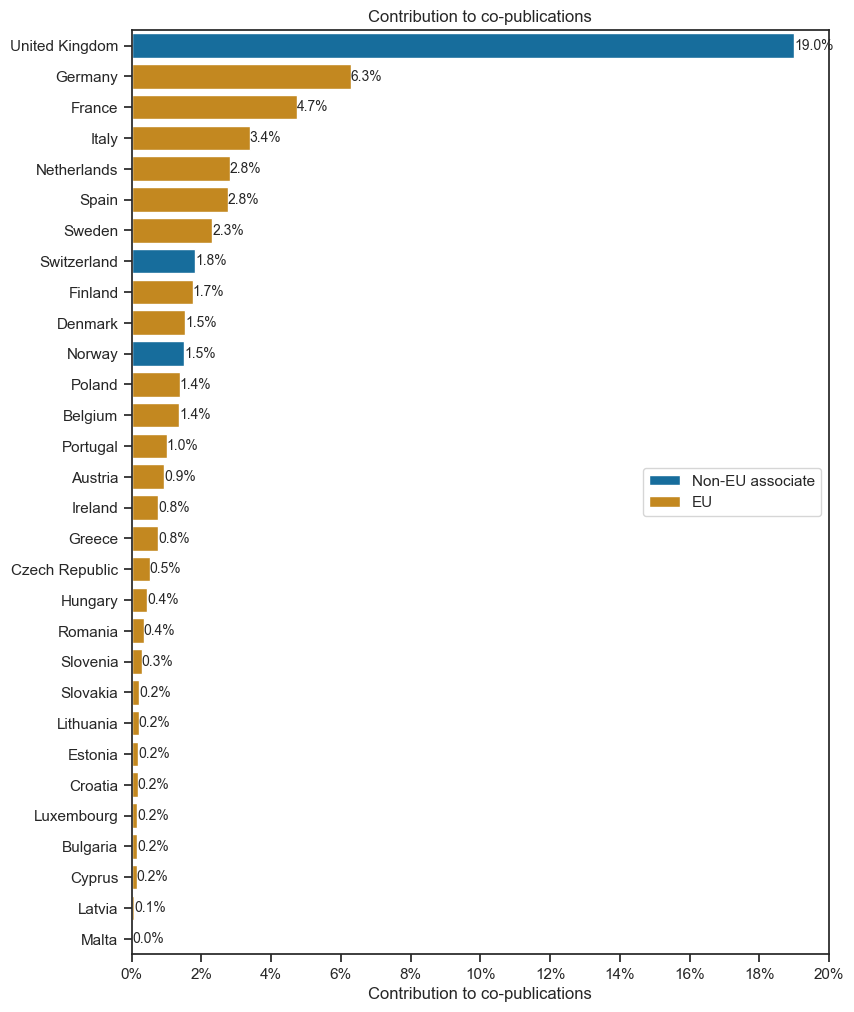

In [261]:
collab_desc = wos_collabs[wos_collabs["Country"]!="China"]["Country"].value_counts().reset_index()
collab_desc["percent_of_copubs"] = collab_desc["count"]/wos_collabs[record_col].nunique()*100
collab_desc["percent_contrib_in_copubs"] = collab_desc["count"]/wos_collabs[record_col].size*100
collab_desc = collab_desc.merge(wos_country_types, on="Country")
collab_desc

c_dict = {"count":"Number of co-publications",
          "percent_of_copubs":"Percent of co-publications",
          "percent_contrib_in_copubs":"Contribution to co-publications"}


# Creating subplot axes
# fig, axes = plt.subplots(ncols=3,figsize=(15, 15))
# for c,ax in zip(c_dict.keys(),axes.flatten()):
for c in c_dict.keys():
    data = collab_desc[["Country",c,"Country_Type"]]
    plt.figure(figsize=(9,12))
    g = sns.barplot(data, x=c, y="Country", hue="Country_Type", dodge=False)
    g.set_xlim(0,roundToNearest(data[c].max()))
    g.set_ylabel(None)
    g.set_xlabel(c_dict.get(c))
    g.set_title(c_dict.get(c))
    g.legend(title=None, loc="right")
    for i in g.containers:
        g.bar_label(i,fontsize=10, fmt='%.1f%%' if 'percent' in c else '%.0f')
    if 'percent' in c:
        g.xaxis.set_major_locator(MaxNLocator(integer=True))
        vals = g.get_xticks()
        g.set_xticklabels([str(int(val))+'%' for val in vals])
    plt.show()

Text(0.5, 71.74999999999994, '')

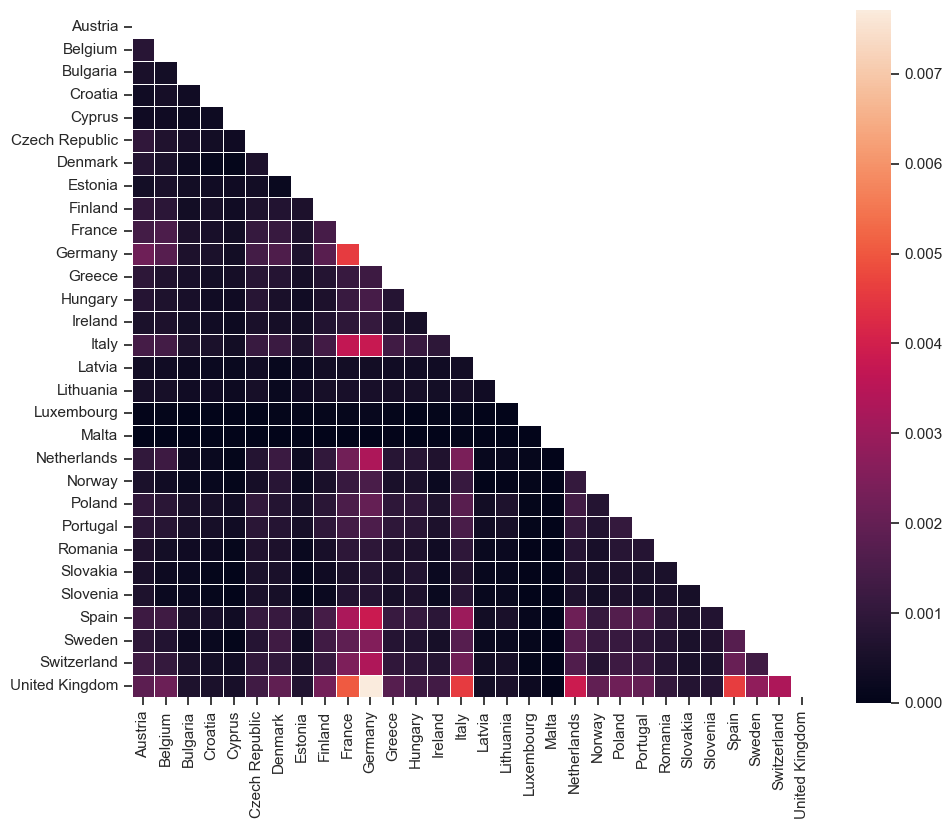

In [328]:
wos_collabs_EU = wos_univ_locations[~wos_univ_locations["Country_Type"].isin(["Other","China"])][[record_col,"Country"]].drop_duplicates()
wos_collabs_EU = wos_collabs_EU.merge(wos_collabs_EU, on=record_col)
EU_co_occur = pd.crosstab(wos_collabs_EU['Country_x'], wos_collabs_EU['Country_y'], values=wos_collabs_EU[record_col], aggfunc='nunique', normalize='all').fillna(0)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(EU_co_occur, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(EU_co_occur, mask=mask,
            square=True, linewidths=.5)

g.set_ylabel(None)
g.set_xlabel(None)

In [44]:
wos.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [45]:
wos[["Affiliations","Addresses"]]

Affiliations   
0     University of Trento; University of Oviedo; Ts...  \
1     Peking University; University of Hamburg; Univ...   
2     Southeast University - China; University of Ca...   
3     Ocean University of China; Universidade de Lis...   
4     Beihang University; Ministry of Natural Resour...   
...                                                 ...   
8587  Shanghai Ocean University; Ministry of Natural...   
8588           Nanjing Audit University; WSB University   
8589  China University of Mining & Technology; Delft...   
8590  Nanjing University of Information Science & Te...   
8591  Nanjing University of Posts & Telecommunicatio...   

                                              Addresses  
0     [Salucci, Marco] Univ Trento, DICAM Dept Civil...  
1     [Huang, Yu; Fu, Zuntao] Peking Univ, Sch Phys,...  
2     [Feng, De-Cheng] Southeast Univ, Minist Educ, ...  
3     [Zhao, Yuliang; Dong, Sheng; Jiang, Fengyuan] ...  
4     [Li, Xiaohui; Yang, Dongkai] Beihang Univ, Sch...  
...                                                 ...  
8587  [He, Qi; Zha, Cheng; Song, Wei; Du, Yanling] S...  
8588  [Hasan, Md Morshadul] Nanjing Audit Univ, Sch ...  
8589  [Li, Yong; Cheng, Gang; Kuai, Moshen] China Un...  
8590  [Zeng, Rong; Zhang, Jiapeng] Nanjing Univ Info...  
8591  [Jia, Yan; Gao, Yun; Tang, Jing; Chen, Yixiang...  

[8592 rows x 2 columns]